## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

### **Read the dataset**

In [2]:
data=pd.read_csv("solar_weather.csv")

## **Sample of The Data**

In [3]:
data=data.sample(19600)

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
113260,2020-03-31 19:00:00,0,0.0,-1.0,1027,72,2.7,0.0,0.0,0,0,0,780,0.00,1,19,3
106064,2020-01-16 20:00:00,0,0.0,3.3,1029,92,3.3,0.0,0.0,68,0,0,480,0.00,3,20,1
135807,2020-11-21 15:45:00,0,0.0,4.7,1026,80,7.7,0.0,0.0,100,0,0,510,0.00,4,15,11
5843,2017-03-07 20:45:00,0,0.0,0.7,1017,86,0.8,0.0,0.0,96,0,0,675,0.00,4,20,3
123860,2020-07-20 05:00:00,434,36.3,18.1,1014,93,1.6,0.0,0.0,96,1,135,975,0.14,4,5,7


In [5]:
data.tail()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
189242,2022-06-14 06:30:00,816,50.7,12.4,1020,78,6.5,0.00,0.0,100,1,255,1020,0.25,4,6,6
129747,2020-09-19 12:45:00,3382,108.5,17.6,1025,47,0.9,0.00,0.0,100,1,495,735,0.67,4,12,9
193701,2022-07-30 17:15:00,219,5.0,22.2,1016,52,3.1,0.00,0.0,98,1,855,945,0.90,4,17,7
11369,2017-05-04 10:15:00,622,51.0,10.0,1020,87,5.1,0.66,0.0,100,1,435,915,0.48,5,10,5
154561,2021-06-05 00:15:00,0,0.0,15.6,1022,88,2.3,0.00,0.0,14,0,0,1005,0.00,2,0,6


### Understand the shape of the dataset.

In [6]:
data.shape

(19600, 17)

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19600 entries, 113260 to 154561
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    19600 non-null  object 
 1   Energy delta[Wh]        19600 non-null  int64  
 2   GHI                     19600 non-null  float64
 3   temp                    19600 non-null  float64
 4   pressure                19600 non-null  int64  
 5   humidity                19600 non-null  int64  
 6   wind_speed              19600 non-null  float64
 7   rain_1h                 19600 non-null  float64
 8   snow_1h                 19600 non-null  float64
 9   clouds_all              19600 non-null  int64  
 10  isSun                   19600 non-null  int64  
 11  sunlightTime            19600 non-null  int64  
 12  dayLength               19600 non-null  int64  
 13  SunlightTime/daylength  19600 non-null  float64
 14  weather_type            19600 non-nul

### Summary of the dataset.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Energy delta[Wh],19600.0,577.904286,1047.873267,0.0,0.0,0.00,586.25,4913.00
GHI,19600.0,32.989827,52.110594,0.0,0.0,2.00,48.30,225.80
temp,19600.0,9.856122,8.002430,-15.6,3.6,9.40,15.80,35.10
pressure,19600.0,1015.370714,9.589584,978.0,1010.0,1016.00,1021.00,1046.00
humidity,19600.0,79.641735,15.647160,23.0,70.0,84.00,92.00,100.00
wind_speed,19600.0,3.925148,1.812188,0.0,2.5,3.70,5.00,14.20
rain_1h,19600.0,0.066128,0.271112,0.0,0.0,0.00,0.00,6.28
snow_1h,19600.0,0.006614,0.062151,0.0,0.0,0.00,0.00,2.33
clouds_all,19600.0,65.576582,36.772687,0.0,33.0,81.00,99.00,100.00
isSun,19600.0,0.523520,0.499459,0.0,0.0,1.00,1.00,1.00


**Dropping columns which are not adding any information.**

In [9]:
data.drop(["Time"],axis=1,inplace=True)

## Exploratory Data Analysis (EDA)

### Univariate analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Plotting histograms and boxplots for all the variables

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

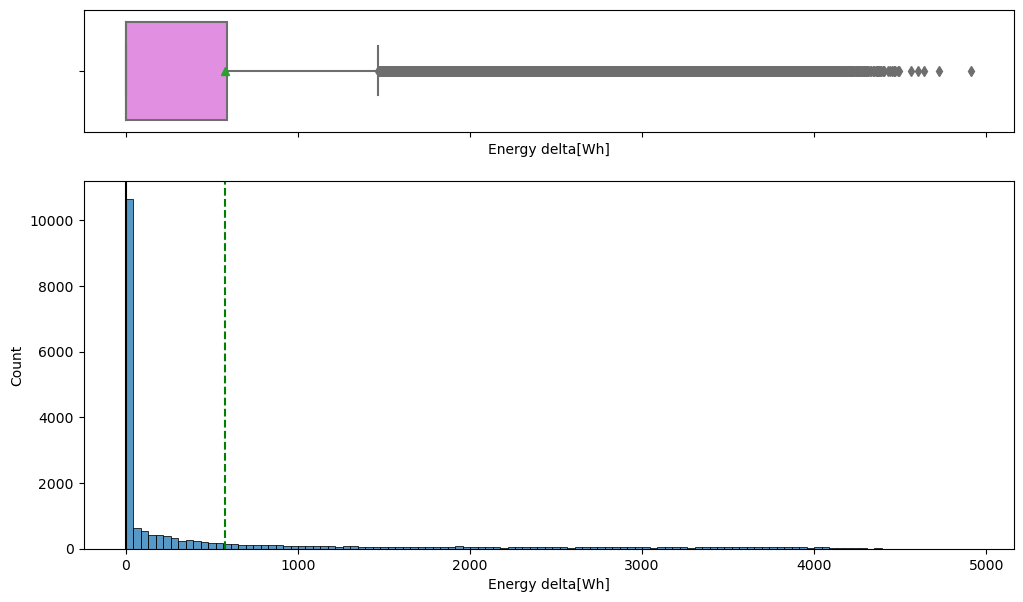

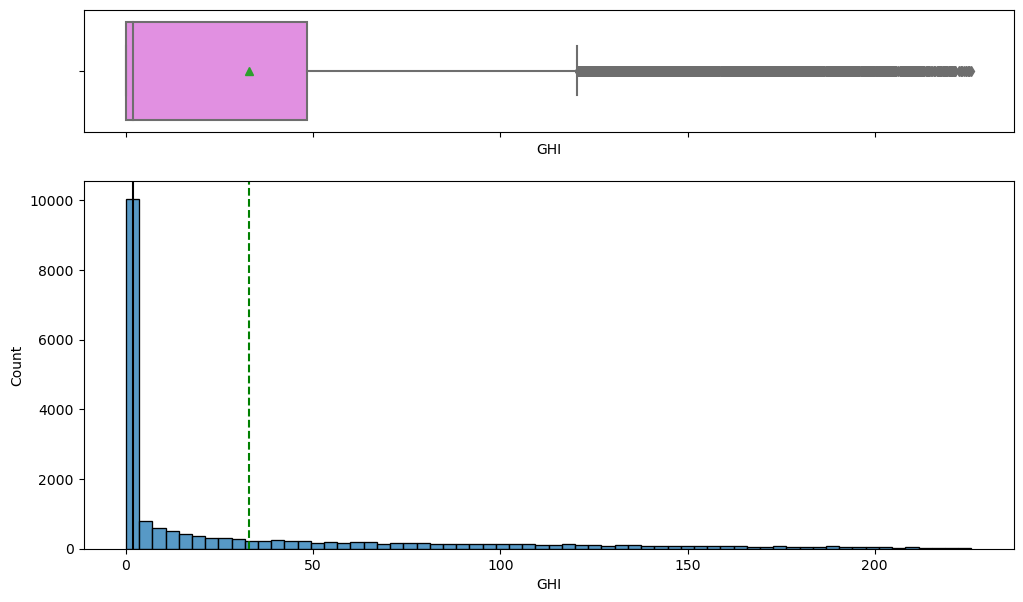

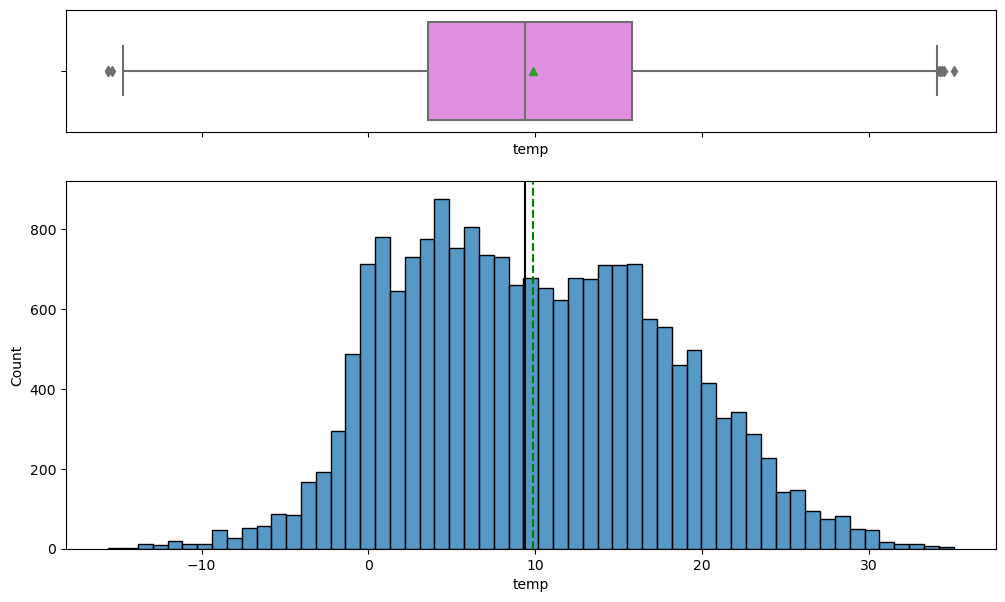

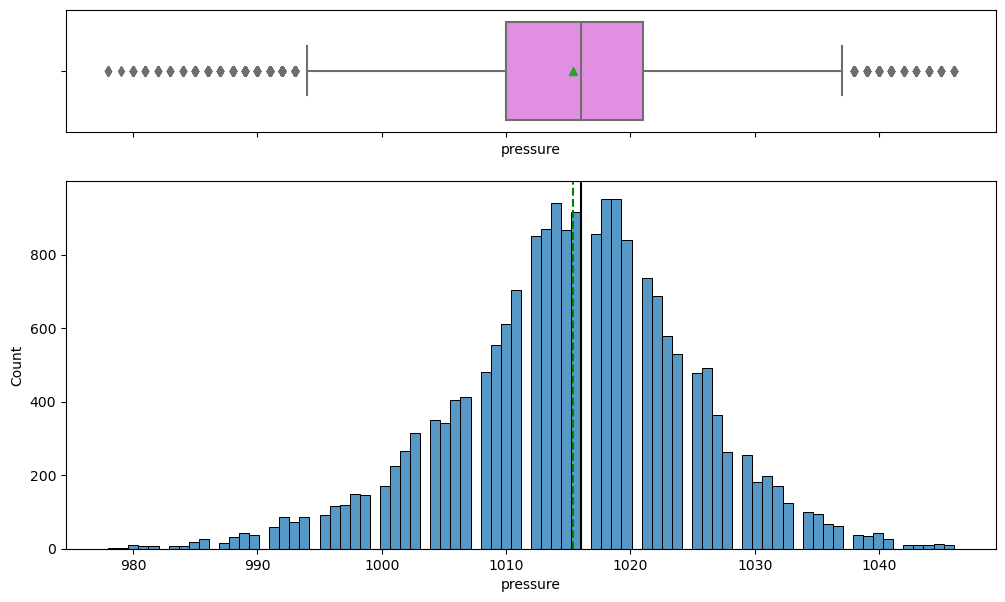

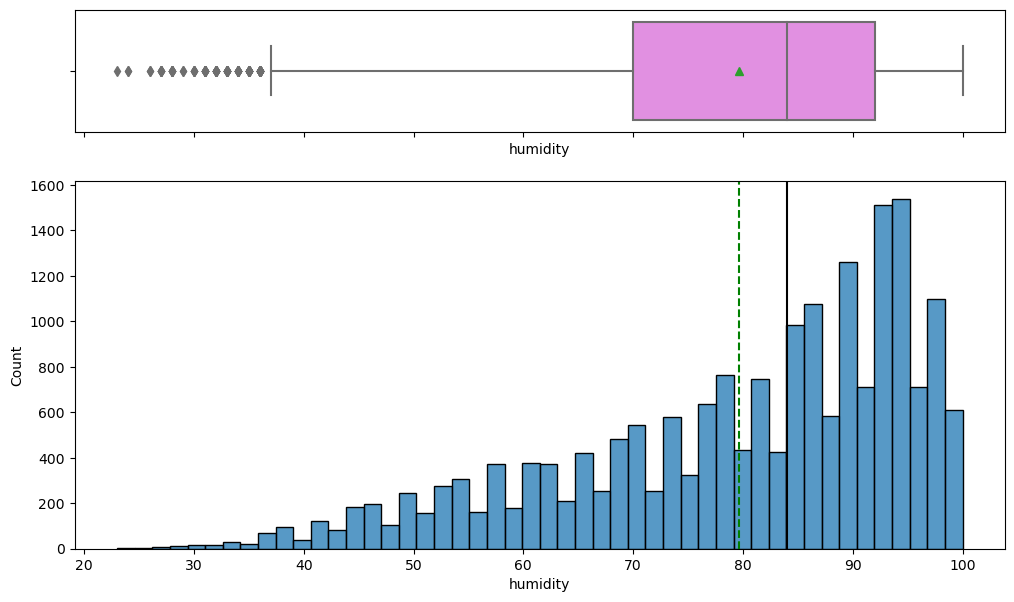

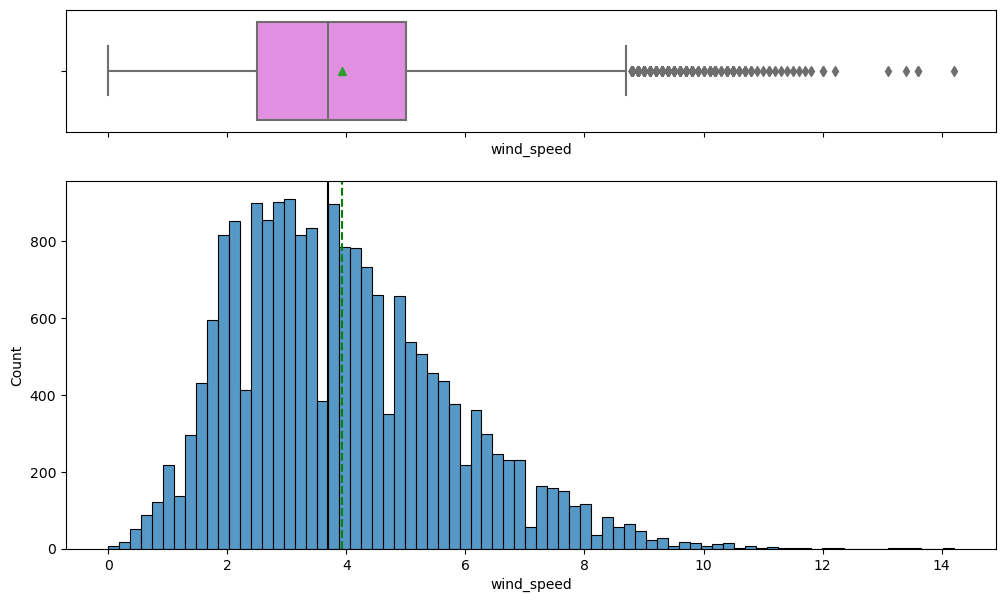

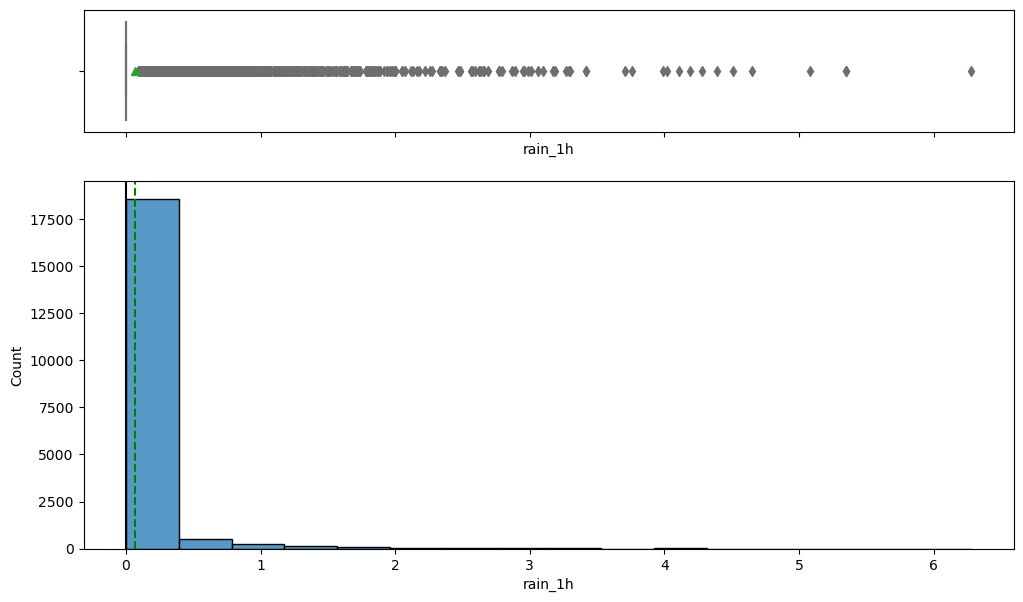

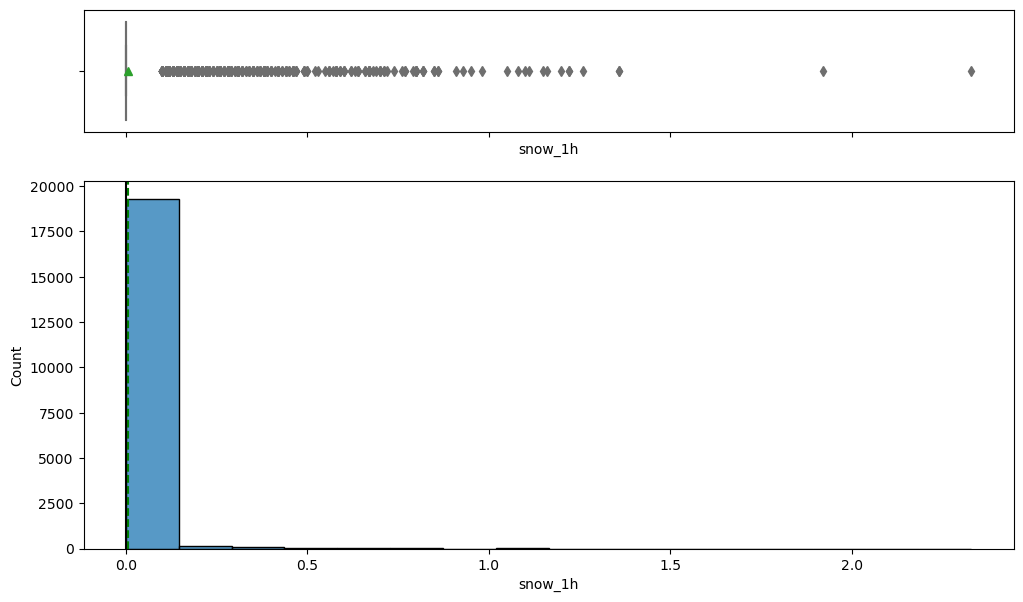

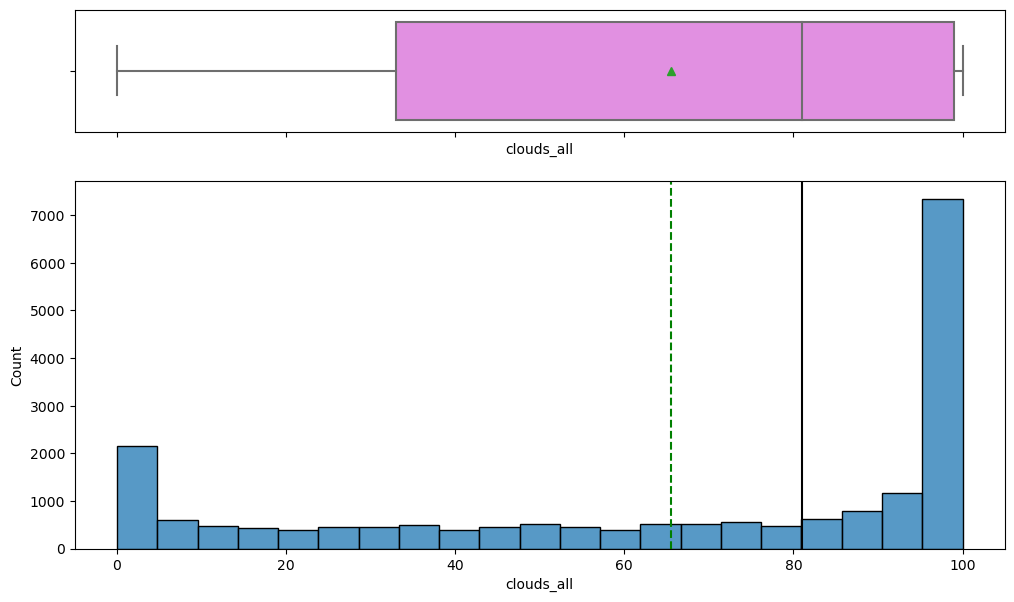

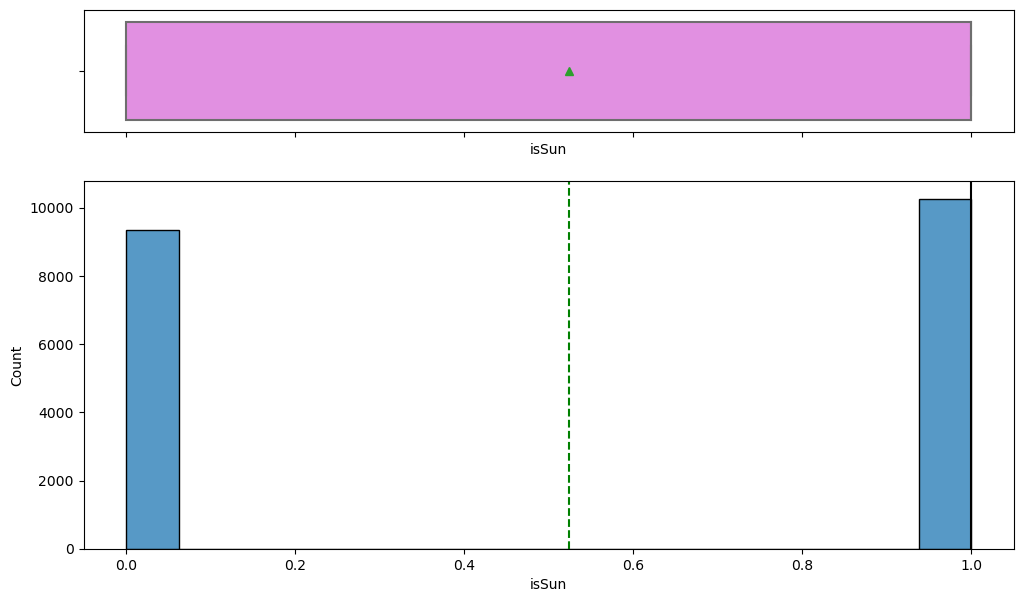

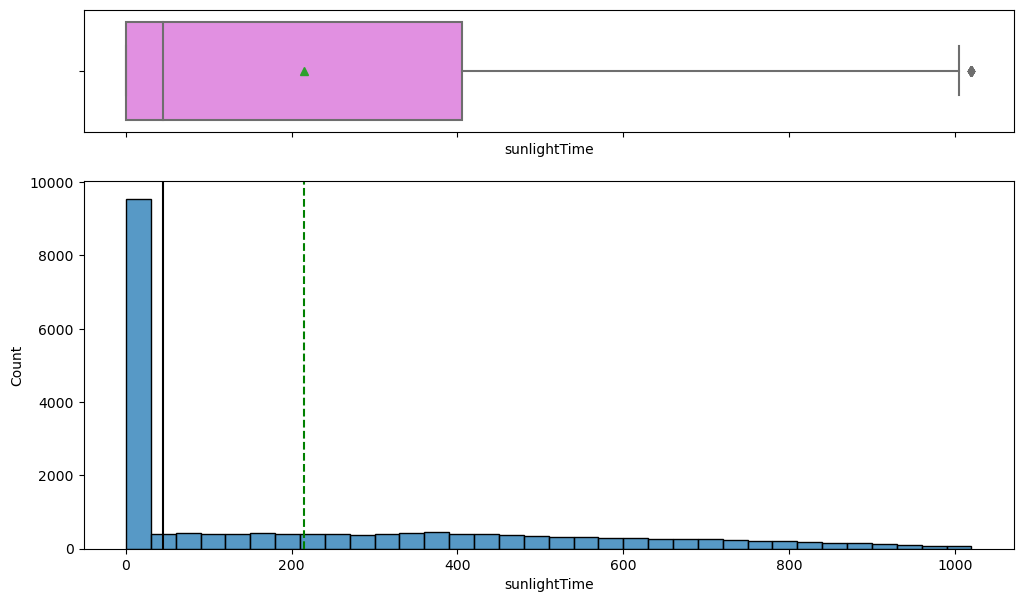

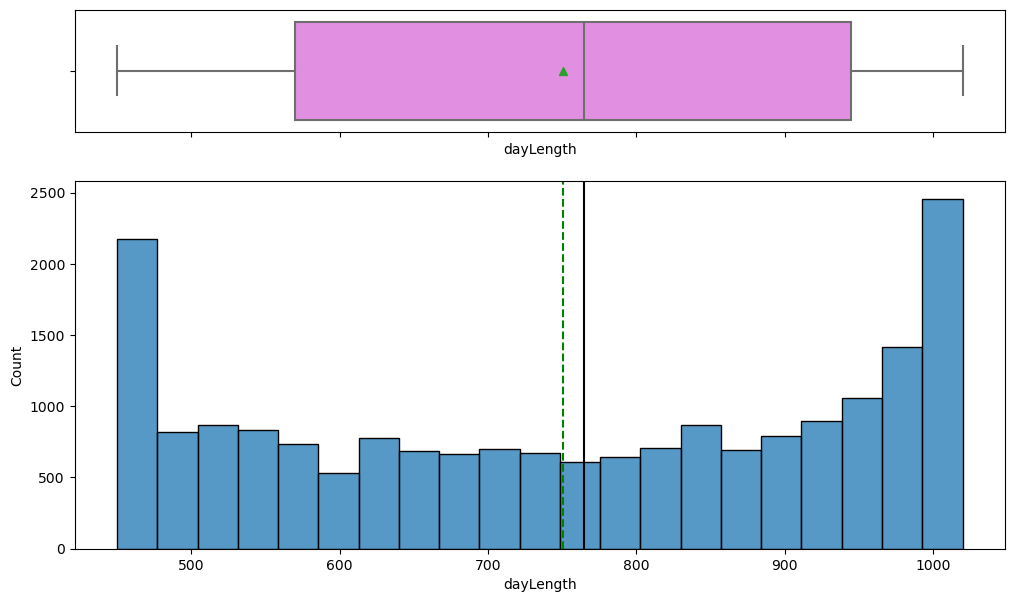

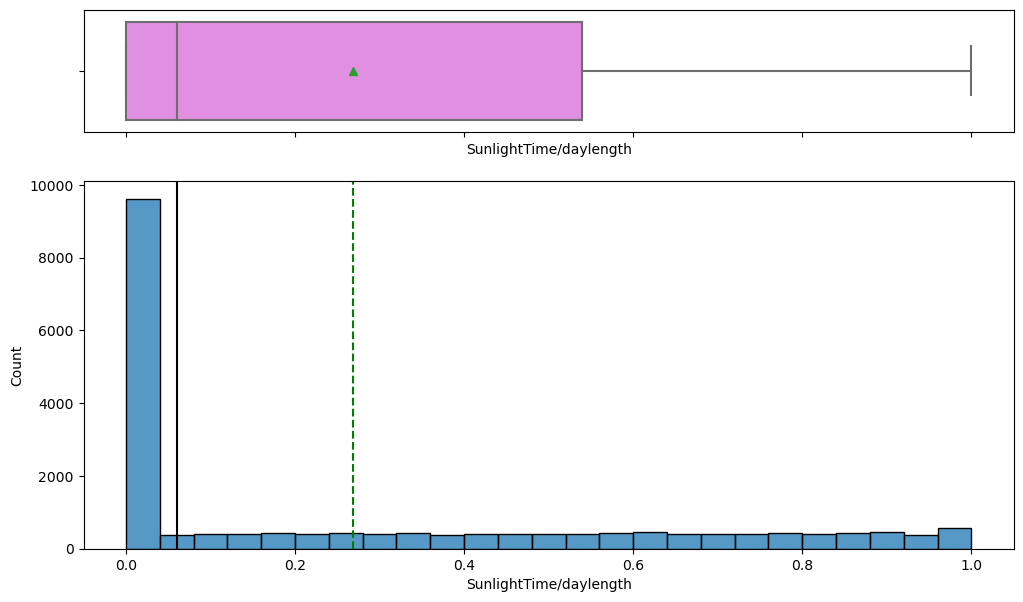

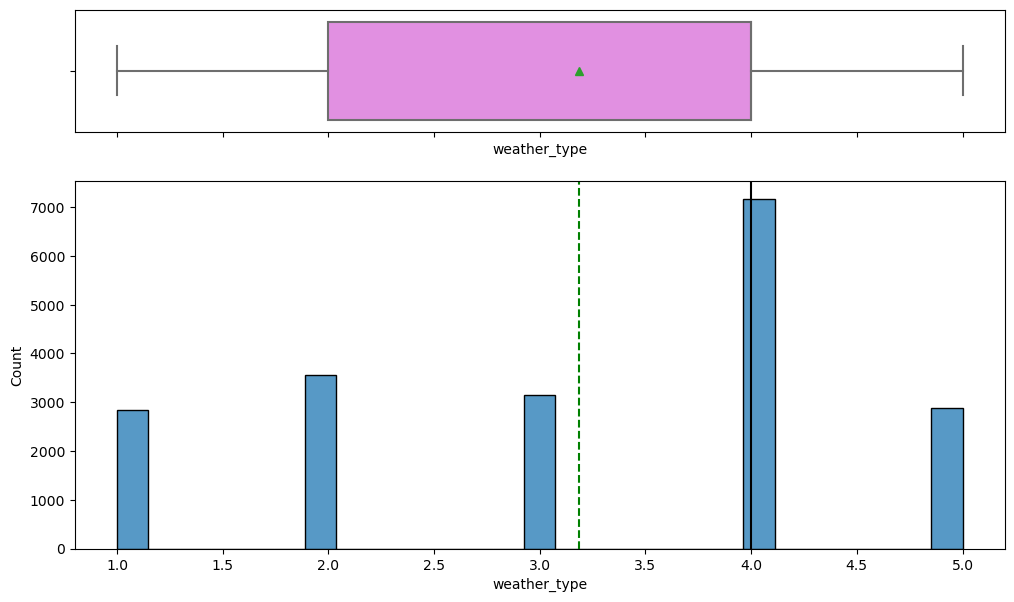

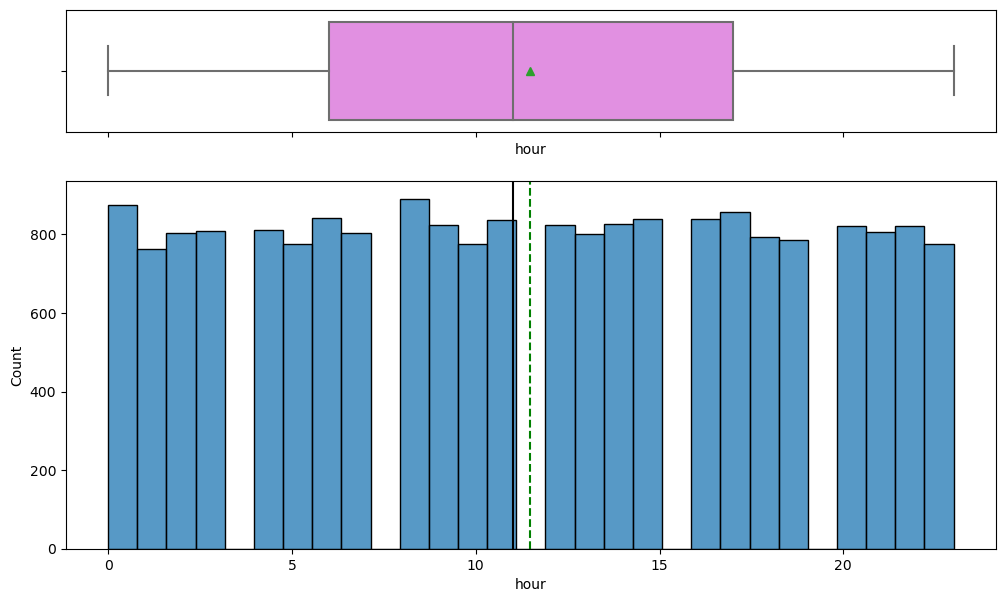

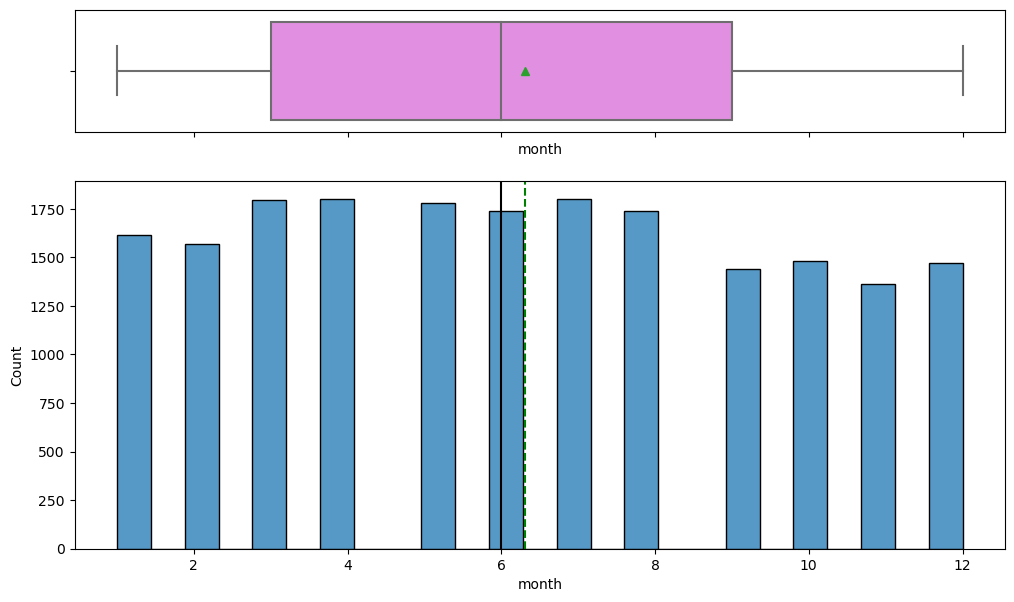

In [11]:
for feature in data.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

## Bivariate Analysis

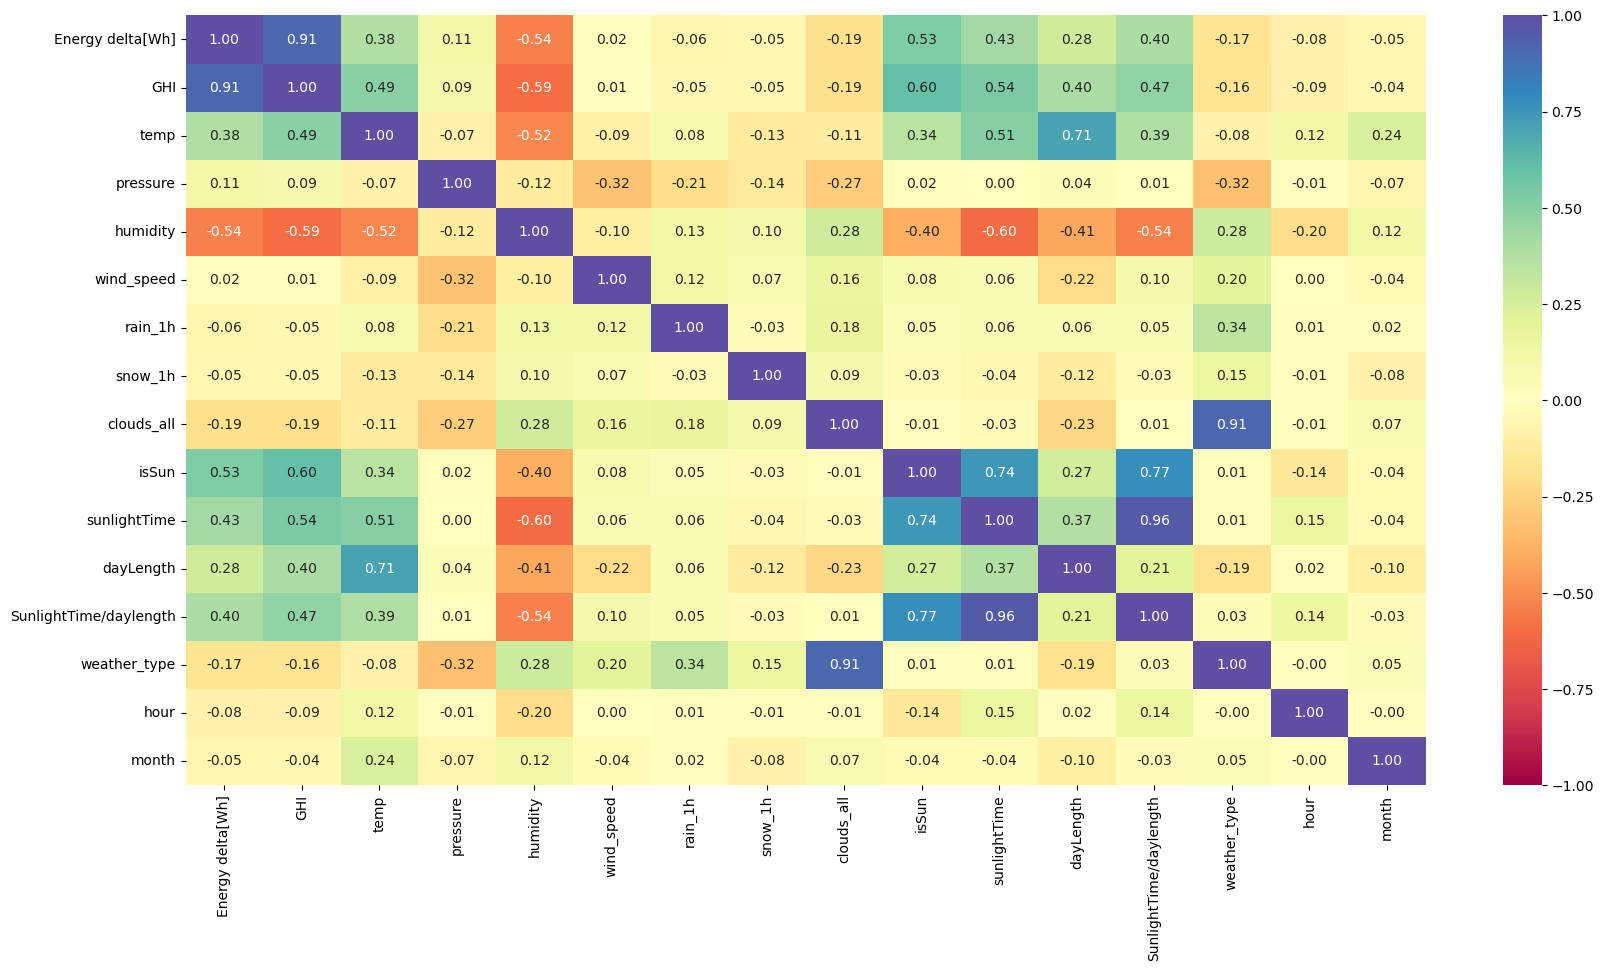

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [13]:
data.duplicated().sum()

1212

- There are 1226 duplicates in this dataset

## **Drop The Duplicates**

In [14]:
data=data.drop_duplicates()

In [15]:
data.duplicated().sum()

0

We have dropped all the duplicates

In [16]:
data.isnull().sum()

Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

In [17]:
# we first create a copy of the data to avoid changes to it
df = data.copy()

### Outlier Check

- Let's check for outliers in the data.

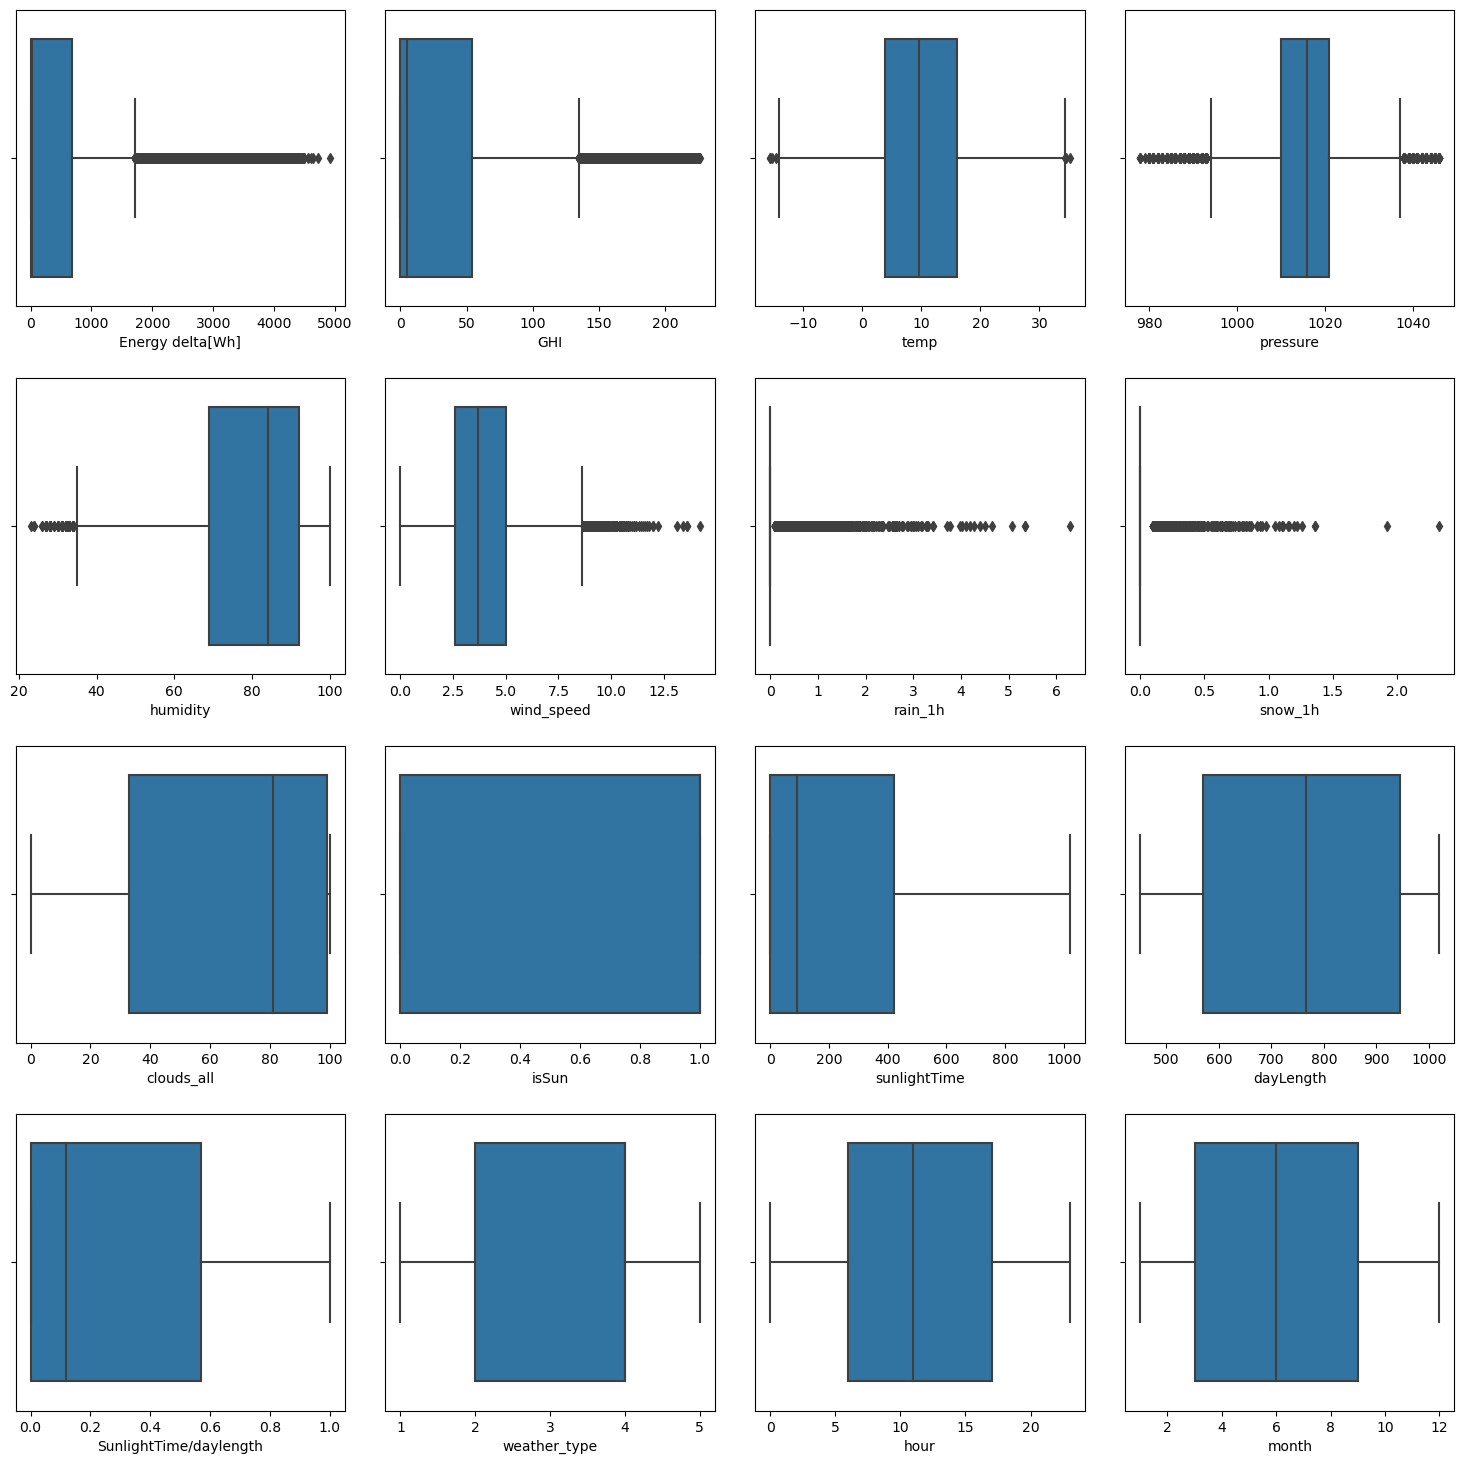

In [18]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Treating Outliers

In [19]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

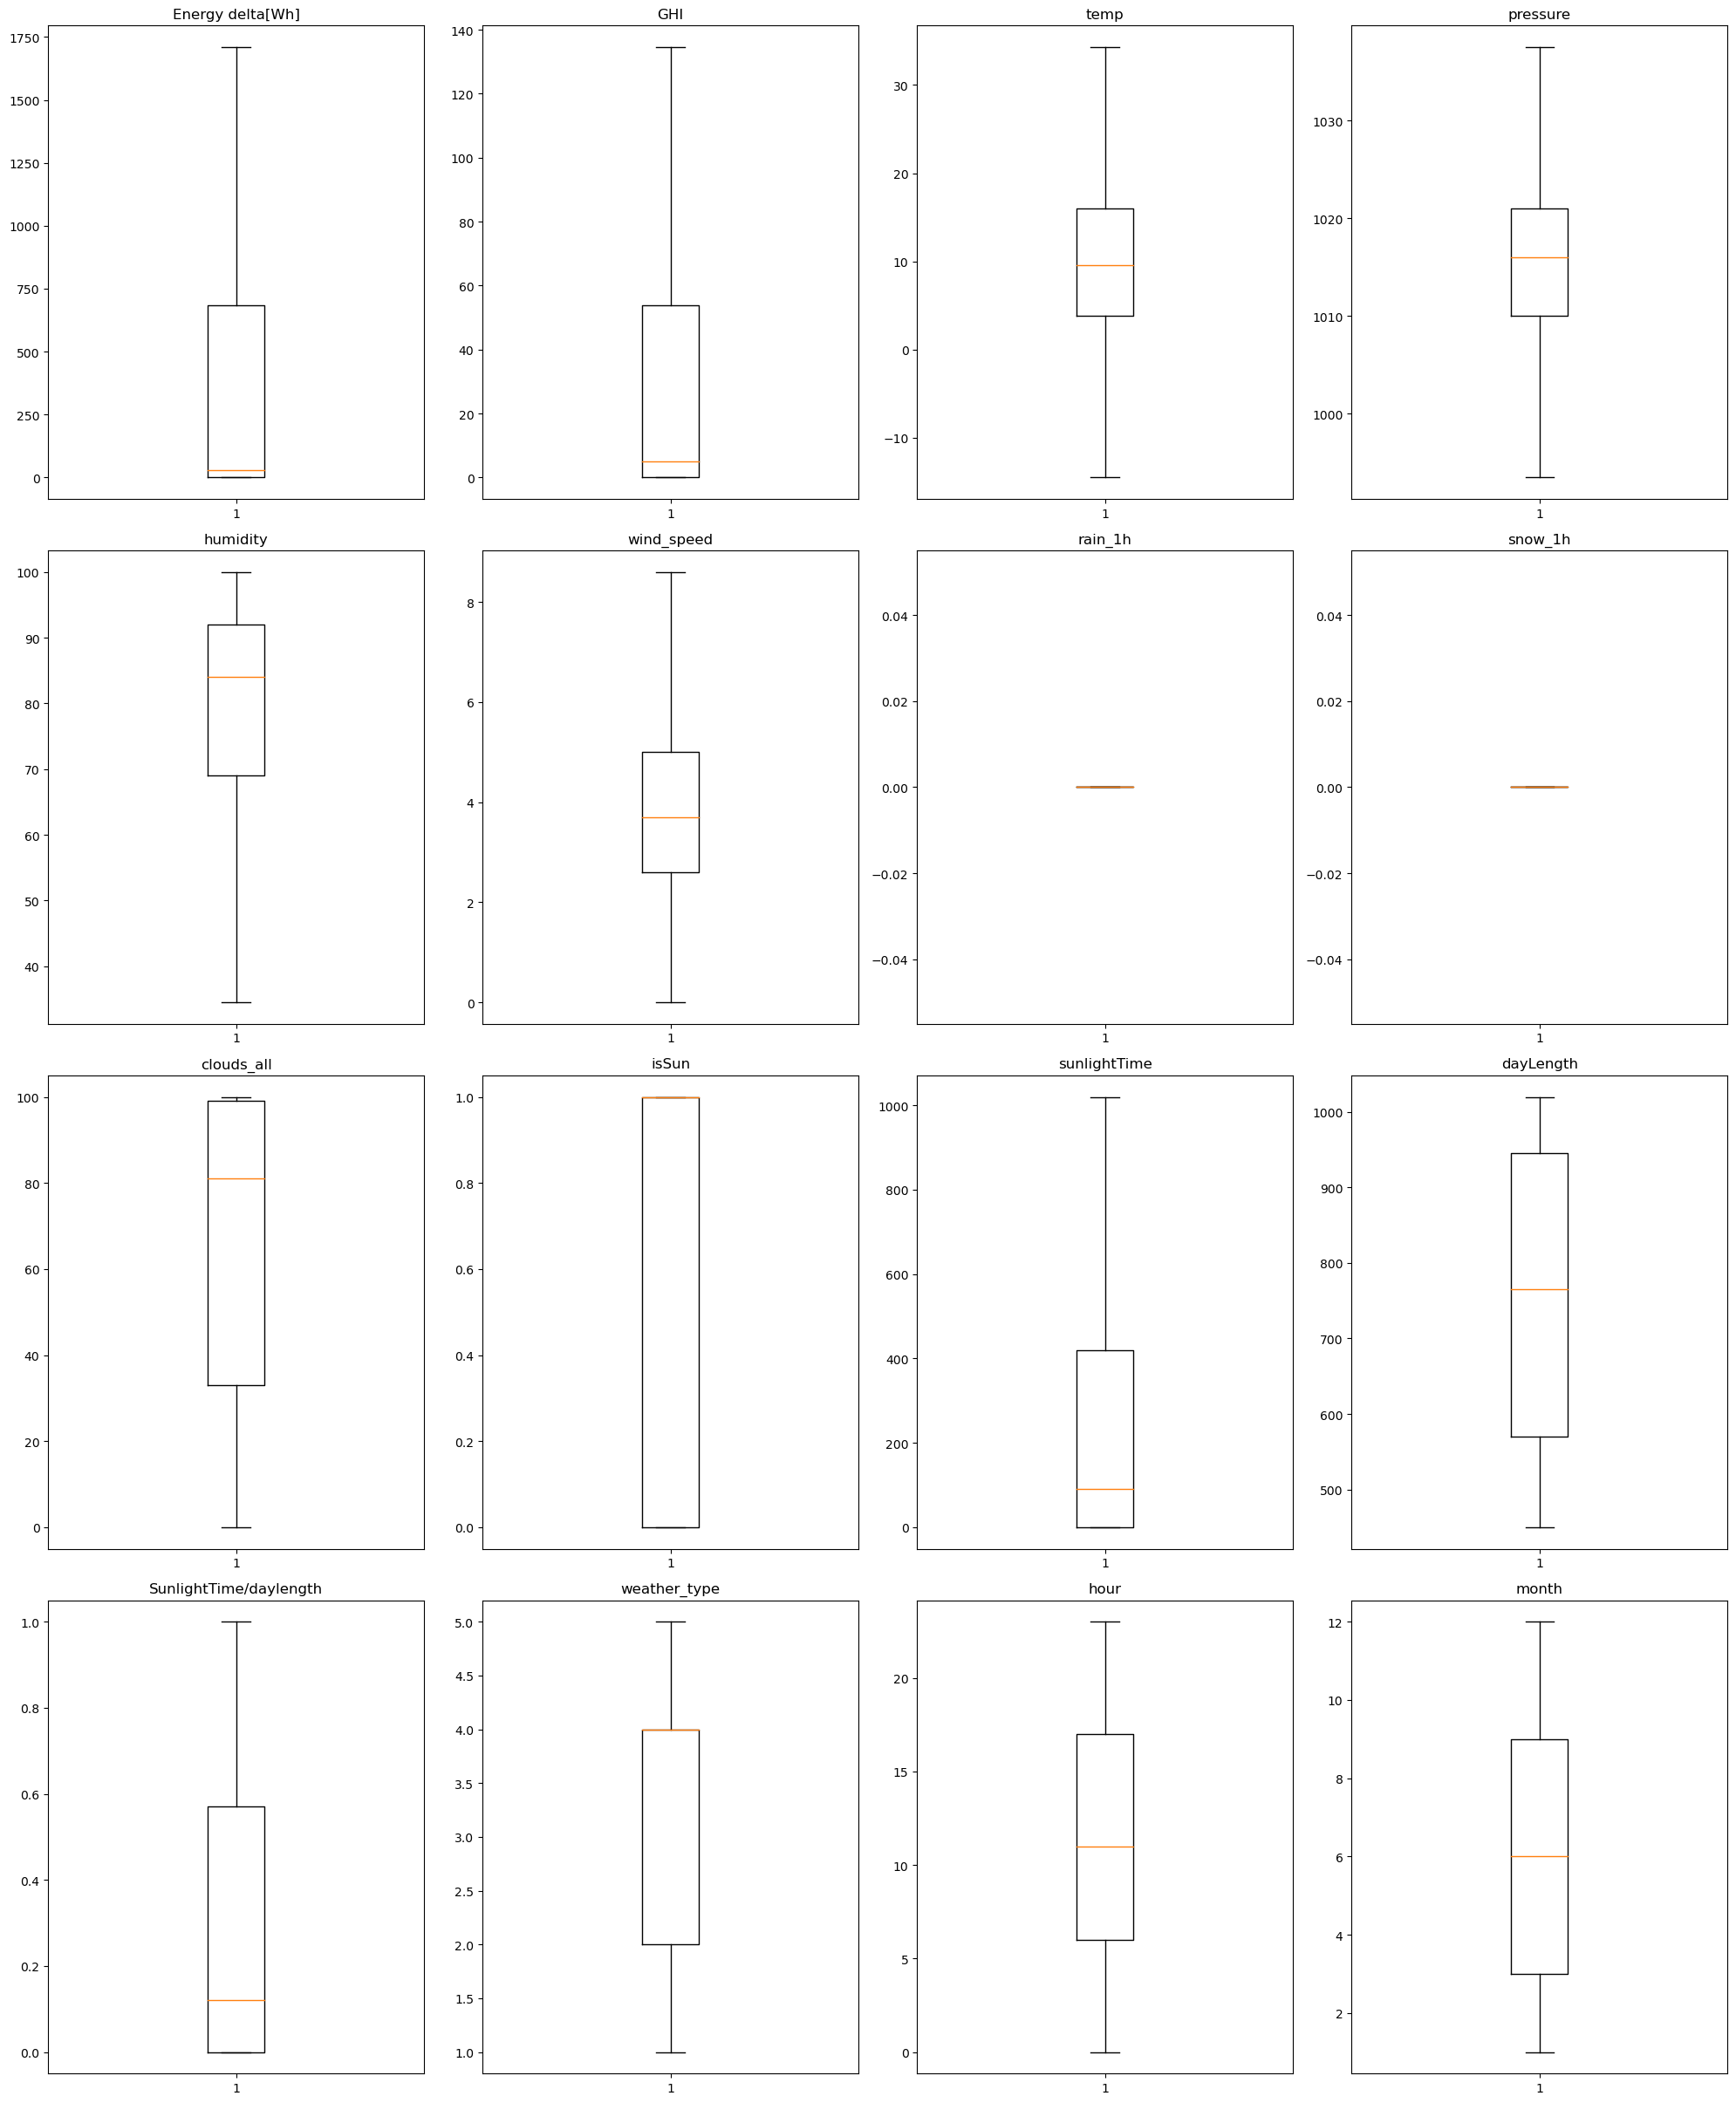

In [20]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## **Split the dataset**

In [21]:
# Separating features and the target column
X = data.drop(['temp'], axis=1)
y = data['temp']

print(X.head())
print(y.head())

        Energy delta[Wh]   GHI  pressure  humidity  wind_speed  rain_1h  \
113260                 0   0.0      1027        72         2.7      0.0   
106064                 0   0.0      1029        92         3.3      0.0   
135807                 0   0.0      1026        80         7.7      0.0   
5843                   0   0.0      1017        86         0.8      0.0   
123860               434  36.3      1014        93         1.6      0.0   

        snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
113260      0.0           0      0             0        780   
106064      0.0          68      0             0        480   
135807      0.0         100      0             0        510   
5843        0.0          96      0             0        675   
123860      0.0          96      1           135        975   

        SunlightTime/daylength  weather_type  hour  month  
113260                    0.00             1    19      3  
106064                    0.00             3    20

In [22]:
# Splitting the data into train and test sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [23]:
X_train.shape, X_test.shape

((14710, 15), (3678, 15))

- We have 14,656 observations in the train set and 3,664 observations in the test set.

## **Building Models**

- We'll fit different models on the train data and observe their performance.
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

In [24]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [25]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))

    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True:
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

    # returning the list with train and test scores
    return score_list

## Decision Tree Model

In [26]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [28]:
dtree_model_train_perf=model_performance_regression(dtree, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
            RMSE           MAE  R-squared  Adj. R-squared          MAPE
0  9.975310e-17  4.556745e-18        1.0             1.0  5.291019e-17


In [29]:
dtree_model_test_perf=model_performance_regression(dtree, X_test,y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  3.640524  2.481213   0.794761         0.79392   NaN


- The Decision tree model with default parameters is overfitting the train data.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

In [30]:
#from sklearn import tree
# Plot the decision tree
#plt.figure(figsize=(6, 6))
#tree.plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True)
#plt.title("Decision Tree Regressor Visualization")
#plt.show()

### Hyperparameter Tuning

In [31]:
# Choose the type of regressor.
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None],
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }
   
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=14, min_impurity_decrease=0.01,
                      min_samples_leaf=3, random_state=1)

In [32]:
dtree_tuned_model_train_perf = model_performance_regression(dtree_tuned, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
            RMSE           MAE  R-squared  Adj. R-squared          MAPE
0  9.975310e-17  4.556745e-18        1.0             1.0  5.291019e-17


In [33]:
dtree_tuned_model_test_perf = model_performance_regression(dtree_tuned, X_test,y_test)
print("Testing performance \n",dtree_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  3.256085  2.505479   0.835818        0.835146   NaN


- The overfitting is reduced after hyperparameter tuning and the test score has increased by approx 3%.
- RMSE is also reduced on test data and the model is generalizing better than the decision tree model with default parameters.

**Plotting the feature importance of each variable**

In [34]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
dayLength               0.592177
month                   0.195178
humidity                0.086661
sunlightTime            0.059540
wind_speed              0.019366
pressure                0.019070
clouds_all              0.011357
hour                    0.007324
GHI                     0.003223
rain_1h                 0.002233
snow_1h                 0.001440
SunlightTime/daylength  0.001077
weather_type            0.000928
Energy delta[Wh]        0.000426
isSun                   0.000000


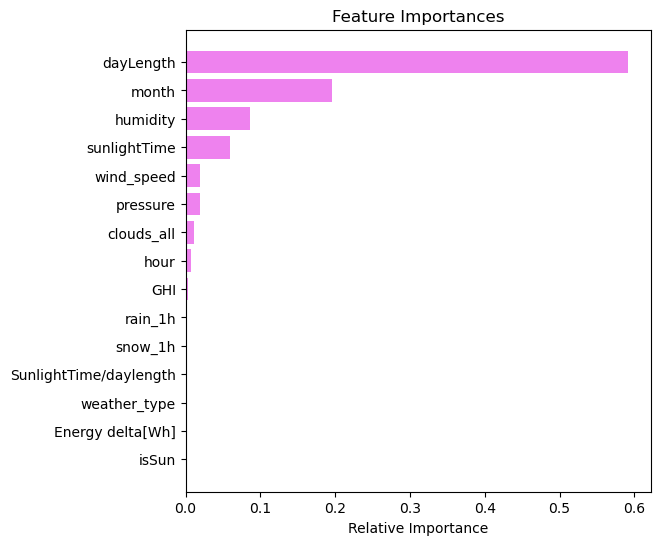

In [35]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Day length is the most important feature, in addition to month, humidity and sunlight time, for tuned decision tree model

## Random Forest Model

In [36]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [37]:
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.953137  0.699589   0.985942        0.985927   NaN


In [38]:
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  2.512119  1.857327   0.902273        0.901873   NaN


- Random forest is giving a good r2 score of 90% on the test data but it is slightly overfitting the train data.
- Let's try to reduce this overfitting by hyperparameter tuning.

### Hyperparameter Tuning

In [39]:
# Choose the type of regressor.
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=120, random_state=1)

In [40]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.948326  0.697455   0.986083        0.986069   NaN


In [41]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
      RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  2.5091  1.855452   0.902508        0.902109   NaN


- No significant change in the result. The result is almost the same before or after the hyperparameter tuning.

In [42]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
dayLength               0.526009
month                   0.172637
humidity                0.096373
sunlightTime            0.054243
wind_speed              0.038416
pressure                0.036772
clouds_all              0.025483
hour                    0.015042
GHI                     0.009632
Energy delta[Wh]        0.007752
SunlightTime/daylength  0.006553
rain_1h                 0.005040
weather_type            0.004020
snow_1h                 0.001788
isSun                   0.000240


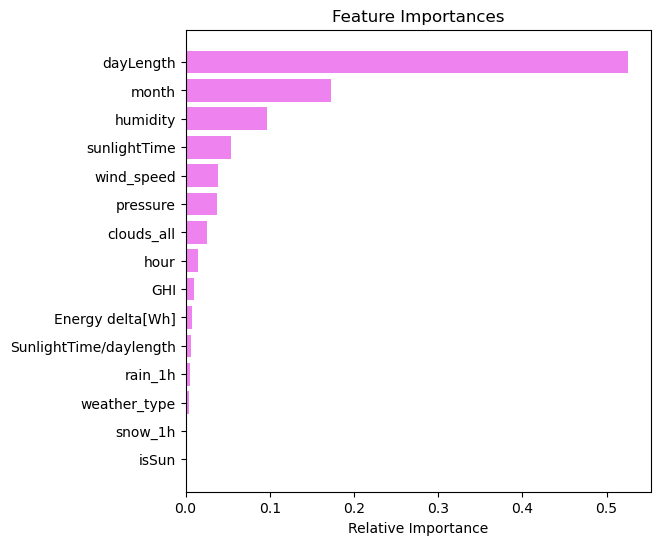

In [43]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 Day length is the most important feature, in addition to month, humidity and sunlight time, for tuned random forest model

## Boosting Models


### **AdaBoost Regressor**

In [44]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [45]:
ab_regressor_model_train_perf = model_performance_regression(ab_regressor, X_train,y_train)
print("Training performance \n",ab_regressor_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  3.713988  2.995068   0.786544        0.786326   NaN


In [46]:
ab_regressor_model_test_perf = model_performance_regression(ab_regressor, X_test,y_test)
print("Testing performance \n",ab_regressor_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  3.669228  2.927606   0.791511        0.790657   NaN


- AdaBoost is generalizing well but it is giving poor performance, in terms of r2 score as well as RMSE, as compared to the decision tree and random forest model.

### Hyperparameter Tuning

In [47]:
# Choose the type of regressor.
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10),
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=90, random_state=1)

In [48]:
ab_tuned_model_train_perf = model_performance_regression(ab_tuned, X_train,y_train)
print("Training performance \n",ab_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  3.685361  2.955776   0.789822        0.789607   NaN


In [49]:
ab_tuned_model_test_perf = model_performance_regression(ab_tuned, X_test,y_test)
print("Testing performance \n",ab_tuned_model_train_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  3.685361  2.955776   0.789822        0.789607   NaN


- We can see that there is no significant improvement in the model after hyperparameter tuning.

In [50]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
dayLength               0.533395
month                   0.171285
humidity                0.092310
sunlightTime            0.089528
hour                    0.049966
wind_speed              0.037938
pressure                0.013319
clouds_all              0.008792
GHI                     0.002066
Energy delta[Wh]        0.000814
rain_1h                 0.000294
SunlightTime/daylength  0.000292
snow_1h                 0.000000
isSun                   0.000000
weather_type            0.000000


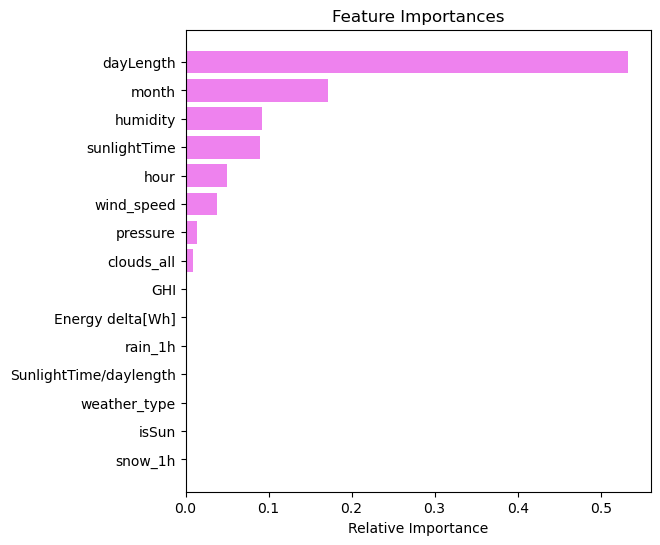

In [51]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Day length is the most important feature, in addition to month, humidity and sunlight time, for tuned random forest model

### Gradient Boosting Regressor

In [52]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [53]:
gb_estimator_model_train_perf = model_performance_regression(gb_estimator, X_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  3.098463  2.407844   0.851434        0.851282   NaN


In [54]:
gb_estimator_model_test_perf = model_performance_regression(gb_estimator, X_test, y_test)
print("Testing performance \n",gb_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  3.149265  2.421743   0.846414        0.845785   NaN


- Gradient boosting is generalizing well and giving decent results but not as good as random forest.

### Hyperparameter Tuning

In [55]:
# Choose the type of regressor.
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25),
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, max_features=0.7, n_estimators=175,
                          random_state=1, subsample=0.9)

In [56]:
gb_tuned_model_train_perf = model_performance_regression(gb_tuned, X_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.530732  0.382578   0.995641        0.995637   NaN


In [57]:
gb_tuned_model_test_perf = model_performance_regression(gb_tuned, X_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  2.42029  1.778628   0.909287        0.908916   NaN


In [58]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
dayLength               0.407099
month                   0.272842
humidity                0.073773
sunlightTime            0.068581
pressure                0.040502
wind_speed              0.038291
clouds_all              0.024709
GHI                     0.020294
SunlightTime/daylength  0.016118
hour                    0.015138
Energy delta[Wh]        0.009295
rain_1h                 0.005611
weather_type            0.005350
snow_1h                 0.002118
isSun                   0.000279


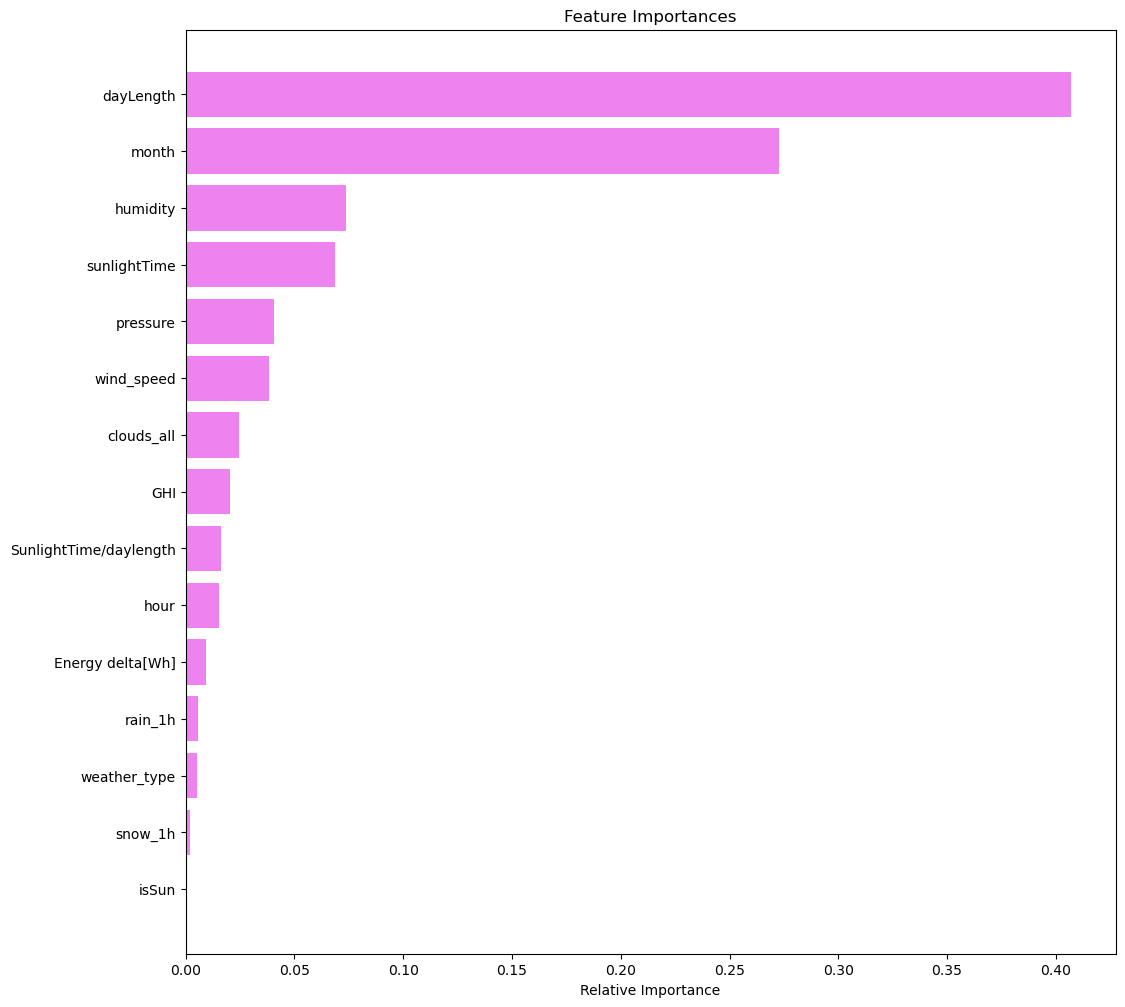

In [59]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Regressor

In [60]:
# Check for prohibited characters in column names
for col in X_train.columns:
    if '[' in col or ']' in col or '<' in col:
        print(f"Column name {col} contains prohibited characters.")

# Clean column names if necessary
X_train.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train.columns]

# Now, fit the model
xgb_estimator = XGBRegressor(random_state=1)
xgb_estimator.fit(X_train, y_train)


Column name Energy delta[Wh] contains prohibited characters.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [61]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  1.902798  1.445948   0.943971        0.943914   NaN


In [62]:
# Rename the 'Energy delta[Wh]' column to 'Energy delta_Wh_' in the test data
X_test.rename(columns={'Energy delta[Wh]': 'Energy delta_Wh_'}, inplace=True)

In [63]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test,y_test)
print("Testing performance \n",xgb_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  2.655948  2.042947   0.890762        0.890315   NaN


### Hyperparameter Tuning

In [64]:
# Choose the type of classifier.
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150],
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=0.8, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [65]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  1.828739  1.385453   0.948248        0.948195   NaN


In [66]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  2.654427  2.037518   0.890887        0.890441   NaN


In [67]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
dayLength               0.369558
month                   0.290544
sunlightTime            0.108264
humidity                0.050731
snow_1h                 0.035532
weather_type            0.028778
hour                    0.020452
pressure                0.016708
wind_speed              0.015561
SunlightTime/daylength  0.012636
clouds_all              0.012615
rain_1h                 0.012326
GHI                     0.010250
isSun                   0.009845
Energy delta_Wh_        0.006200


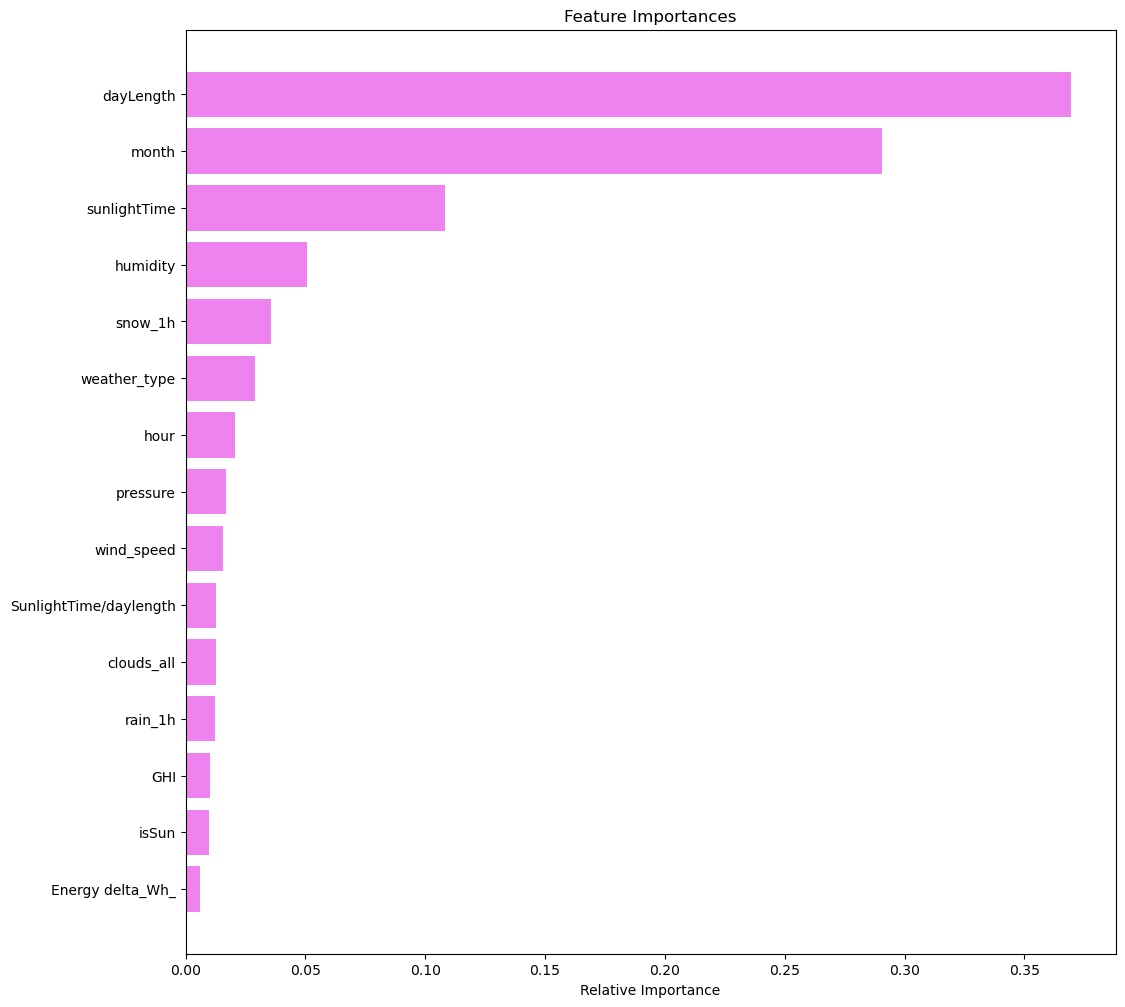

In [68]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [69]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [70]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=14,
                                                     min_impurity_decrease=0.01,
                                                     min_samples_leaf=3,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(max_features=None,
                                                     n_estimators=120,
                                                     random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=10,
                                                         max_features=0.7,
                                                         n_estimators=175,
                                                         random_state=1,
                                                         sub...
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=1, ...))

In [71]:
stacking_estimator_model_train_perf = model_performance_regression(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.97527  0.690714   0.985281        0.985266   NaN


In [72]:
stacking_estimator_model_test_perf = model_performance_regression(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  2.509447  1.850978   0.902481        0.902082   NaN


## Comparing all models

In [73]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_tuned_model_train_perf.T, rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
    ab_regressor_model_train_perf.T,ab_tuned_model_train_perf.T,gb_estimator_model_train_perf.T,gb_tuned_model_train_perf.T,
    xgb_estimator_model_train_perf.T,xgb_tuned_model_train_perf.T,stacking_estimator_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking_Estimator"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking_Estimator
RMSE,9.975310e-17,2.923109,0.953137,0.948326,3.713988,3.685361,3.098463,0.530732,1.902798,1.828739,0.975270
MAE,4.556745e-18,2.284636,0.699589,0.697455,2.995068,2.955776,2.407844,0.382578,1.445948,1.385453,0.690714
R-squared,1.000000e+00,0.867774,0.985942,0.986083,0.786544,0.789822,0.851434,0.995641,0.943971,0.948248,0.985281
Adj. R-squared,1.000000e+00,0.867639,0.985927,0.986069,0.786326,0.789607,0.851282,0.995637,0.943914,0.948195,0.985266
MAPE,5.291019e-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_tuned_model_test_perf.T, rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
    ab_regressor_model_test_perf.T,ab_tuned_model_test_perf.T,gb_estimator_model_test_perf.T,gb_tuned_model_test_perf.T,
    xgb_estimator_model_test_perf.T,xgb_tuned_model_test_perf.T,stacking_estimator_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking_Estimator"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking_Estimator
RMSE,3.640524,3.256085,2.512119,2.509100,3.669228,3.666733,3.149265,2.420290,2.655948,2.654427,2.509447
MAE,2.481213,2.505479,1.857327,1.855452,2.927606,2.918580,2.421743,1.778628,2.042947,2.037518,1.850978
R-squared,0.794761,0.835818,0.902273,0.902508,0.791511,0.791795,0.846414,0.909287,0.890762,0.890887,0.902481
Adj. R-squared,0.793920,0.835146,0.901873,0.902109,0.790657,0.790942,0.845785,0.908916,0.890315,0.890441,0.902082
MAPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
X_test.rename(columns={'Energy delta_Wh_': 'Energy delta[Wh]'}, inplace=True)
y_pred = gb_tuned.predict(X_test)

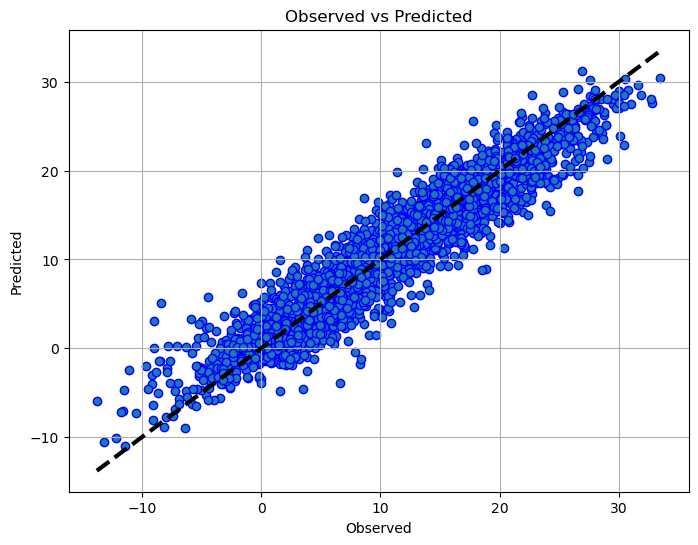

In [76]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

- We can see that points are dense on the line where predicted temperature is equal to the observed.
- This implies that most of the predicted values are close to the true values with some negligible exceptions as seen in the plot.
- There are no outliers that can be seen on the plot, we can infer that this might be the reason for getting very low mape and rmse.

## Saving Tuned Gradient Boosting Model For Deployment

In [77]:
import joblib
# Save the model to a .pkl file
joblib.dump(gb_tuned, 'model.pkl')

['model.pkl']